In [ ]:
# import thư viện
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D,  MaxPool2D, Conv3D, MaxPool3D
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.datasets import mnist
import tensorflow as tf
from sklearn.model_selection  import train_test_split

### Bài 1: Tạo 1 dataset gồm 10 điểm dữ liệu sinh từ hàm y=x^2+noise. Dùng sklearn fit hàm đa thức bậc 9 với dữ liệu trên. Thử thêm 100 điểm dữ liệu nữa xem hàm đa thức bậc 9 sẽ như thế nào

**Trường hợp 1**: Input gồm 10 điểm dữ liệu

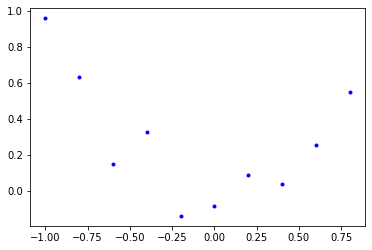

In [ ]:
# Tạo dataset
np.random.seed(2)
x10 = np.arange(-1, 1, 0.2)
y10 = x10 * x10 + np.random.randn(x10.shape[0])/10
plt.plot(x10, y10, 'b.')

Model cần tìm có dạng đa thức bậc 9, nó có thể biểu diễn như sau: 

$\displaystyle \hat{y} = w_0 \; + \; w_1x \; + \; w_2x^2 \; +  \; ... \; + \; w_9x^9$ 

Để thuận tiện tính toán và đơn giản hóa model, ta đưa về mô hình tuyến tính như sau: 

$\displaystyle 
\begin{cases}
x_1 = x \\
x_2 = x^2 \\
x_3 = x^3 \\
... \\
x_9 = x^9 
\end{cases}$

Khi đó, mô hình được chuyển thành Linear Regression như sau:

$\displaystyle
\hat{y} = w_0 \; +\; w_1x_1 \;+\; ... \; +\; w_9x_9
$

Việc chọn $x$ đầu vào trong khoảng $(0, 1)$ giúp việc tìm model dễ dàng hơn do không cần normalize

In [ ]:
# input data
Xbar = np.ones((x10.shape[0], 1))
y10 = y10.reshape(-1, 1)
for i in range(1, 10):
  Xbar = np.concatenate((Xbar, np.power(x10.reshape(-1, 1), i)), axis = 1)

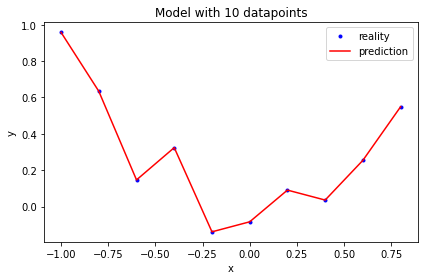

In [ ]:
model = LinearRegression()
model.fit(Xbar, y10)

y_pred = model.predict(Xbar)

plt.plot(x10, y10, 'b.')
plt.plot(x10, y_pred, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model with 10 datapoints')
plt.tight_layout()
plt.legend(['reality', 'prediction'])
plt.show()

**Nhận xét:** Rõ ràng model tìm được đã bị overfit do đánh mất đi tính tổng quát của dữ liệu.

**Trường hợp 2:** Input gồm 100 điểm dữ liệu

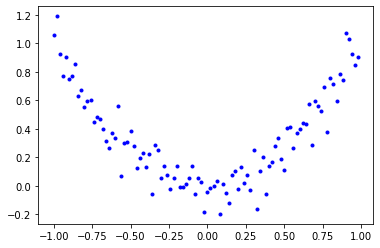

In [ ]:
# create dataset
x100 = np.arange(-1, 1, 0.02)
y100 = x100 * x100 + np.random.randn(x100.shape[0])/10
plt.plot(x100, y100, 'b.')

In [ ]:
# input data
Xbar = np.ones((x100.shape[0], 1))
y100 = y100.reshape(-1, 1)
for i in range(1, 10):
  Xbar = np.concatenate((Xbar, np.power(x100.reshape(-1, 1), i)), axis = 1)

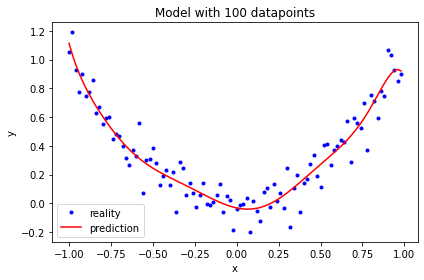

In [ ]:
model = LinearRegression()
model.fit(Xbar, y100)

y_pred = model.predict(Xbar)

plt.plot(x100, y100, 'b.')
plt.plot(x100, y_pred, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model with 100 datapoints')
plt.tight_layout()
plt.legend(['reality', 'prediction'])
plt.show()

**Nhận xét:** Trong trường hợp này thì model đã tổng quát hơn trước nhiều

### Bài 2: Implement hàm tính convolution, input X, W, stride, padding, output Y. Implement hàm sobel

1. Implement hàm tính convolution

In [ ]:
# hàm tính mỗi phần tử của mảng y bằng cách nhân element wise kernel với một phần của ma trận X (là x) rồi tính tổng
def step_convolution(x, w):
  return np.sum(x * w)

# Hàm tính convolution
def convolution(X, W, stride=1, padding=1):
  # lấy kích thước
  kernel_size = W.shape[0]
  x_height = X.shape[0]
  x_width = X.shape[1]

  # thêm padding vào X
  X_padding = np.concatenate( (np.zeros((x_height, padding)), X, np.zeros((x_height, padding))), axis = 1)
  X_padding = np.concatenate( (np.zeros((padding, x_width + 2 * padding)), X_padding, np.zeros((padding, x_width + 2 * padding))), axis = 0)

  x_padding_height = X_padding.shape[0]
  x_padding_width = X_padding.shape[1]

  # Tính kích thước ma trận kết quả
  y_height = (x_padding_height - kernel_size) // stride + 1
  y_width = (x_padding_width - kernel_size) // stride + 1

  # Tính toán đầu ra
  y = np.zeros((y_height, y_width))

  for row in range(0, y_height):
    for col in range(0, y_width):
      y_ = step_convolution(X_padding[row * stride: row * stride + kernel_size, col * stride : col * stride + kernel_size], W)
      y[row, col] = y_

  return y

In [ ]:
# Kiểm tra hàm convolution
test_x = np.array([
                   [1, 6, 4, 6, 4],
                   [7, 3, 7, 9, 4],
                   [5, 6, 7, 8, 3],
                   [1, 3, 6, 3, 5]
])

test_w = np.array([
                   [1, 0, 1, 0, 1],
                   [0, 1, 0, 1, 0],
                   [1, 0, 1, 0, 1],
                   [0, 1, 0, 1, 0],
                   [1, 0, 1, 0, 1]
])

test_y1 = convolution(test_x, test_w, stride = 1, padding = 2)
test_y1

array([[20., 40., 36., 37., 27.],
       [33., 35., 56., 36., 36.],
       [23., 47., 42., 48., 30.],
       [27., 30., 44., 28., 30.]])

In [ ]:
test_y2 = convolution(test_x, test_w, stride = 2, padding = 2)
test_y2

array([[20., 36., 27.],
       [23., 42., 30.]])

**Nhận xét:** Trong trường hợp thứ nhất, vì chọn padding bằng một nửa kernel size và stride bằng 1 nên kích thước đầu ra bằng kích thước đầu vào. Trong trường hợp thứ 2, giữ nguyên tham số như trường hợp thứ nhất, đổi stride bằng 2 thì ma trận kết quả có kích thước giảm đi khoảng 1 nửa so với ma trận ban đầu. Tuy nhiên, giá trị trong 2 ma trận kết quả vẫn có sự tương đồng

2. Implement hàm sobel

In [ ]:
# phép toán sobel
def sobel(X):
  sobelx = np.array([
                   [-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]
  ])

  sobely = np.array([
                   [1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]
  ])

  Gx = convolution(X, sobelx)
  Gy = convolution(X, sobely)

  G = np.sqrt(np.square(Gx) + np.square(Gy))

  max_g = np.max(G)
  min_g = np.min(G)

  G = (G - min_g) / (max_g - min_g) * 255

  return G

In [ ]:
%cd '/content/drive/MyDrive/The Anh Tran/HW4'
!ls

/content/drive/.shortcut-targets-by-id/1iTl5EvhAkwEQhbz8P_bIGaNXAYESafQ8/The Anh Tran/HW4
Homework4.ipynb  test.png


Picture size: 800 x 800


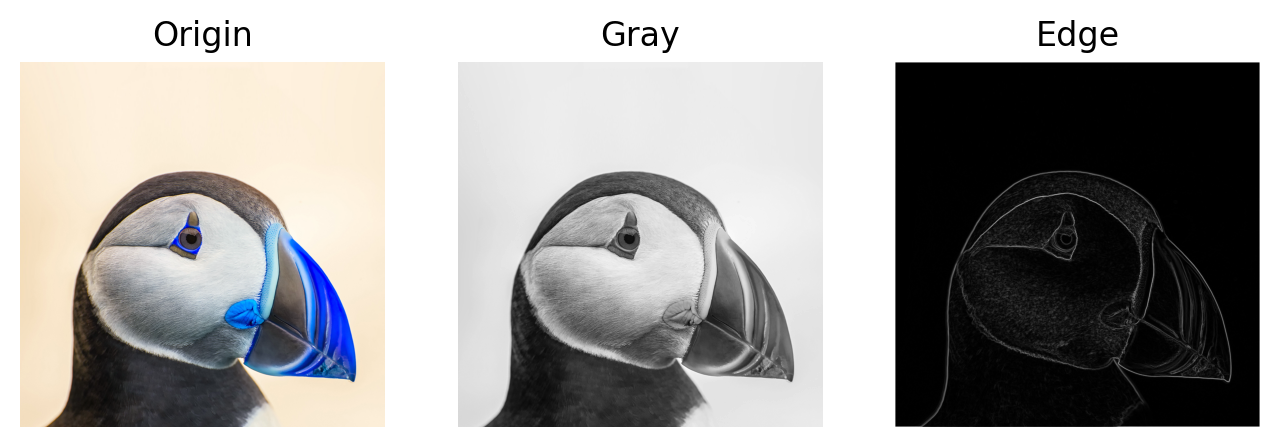

In [ ]:
image = cv2.imread('test.png')

print('Picture size: %d x %d' %(image.shape[0], image.shape[1]))

# chuyển thành ảnh xám
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# tìm edge
edge = sobel(gray_image)

plt.figure(figsize=(8, 24), dpi = 200)

plt.subplot(1, 3, 1)
plt.title('Origin')
plt.axis('off')
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.title('Gray')
plt.axis('off')
plt.imshow(gray_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Edge')
plt.axis('off')
plt.imshow(edge, cmap='gray')

### Bài 3: Hiểu code mẫu, chỉnh hyper như lr, optimizer, kernel size, số kernel,.... So sánh các kết quả.

**Chạy lại code**

In [ ]:
# Load dữ liệu
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_val, y_val = x_train[50_000:60_000, :], y_train[50_000:60_000]
x_train, y_train = x_train[:50_000, :], y_train[:50_000]
print("Training shape: \t", x_train.shape)
print('Validation shape: \t', x_val.shape)

11501568/11490434 [==============================] - 0s 0us/step
Training shape: 	 (50000, 28, 28)
Validation shape: 	 (10000, 28, 28)


In [ ]:
# Reshape lại dữ liệu thành dạng (N, W, H, D) với D = 1
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# chuẩn hóa về khoảng (0, 1)
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

print(x_train.shape)

(50000, 28, 28, 1)


In [ ]:
# one-hot y
print('Origin: ', y_train[0])

y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)
y_test = np_utils.to_categorical(y_test, 10)

print('One-hot: ', y_train[0])

Origin:  5
One-hot:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Định nghĩa model:
1. Model = Sequential() để định nghĩa model bằng cách xếp chồng các layer lên nhau để tạo thành model. Ví dụ: Input -> CONV -> POOL -> FLATTEN -> FC -> OUTPUT
2. Layer đầu tiên cần chỉ rõ input_shape của ảnh, input_shape=(W, H, D). Trong trường hợp này là (28, 28, 1)
3. Khi thêm Convolutional Layer thì ta cần chỉ rõ các tham số: K (số lượng layer), kernel size (W, H), hàm activation sử dụng. Cấu trúc như sau: model.add(Conv2D(K, (W, H), activation='myFunction'))
4. Khi thêm MaxPooling layer thì cần chỉ rõ size của kernel, model.add(MaxPooling2D(pool_size=(W, H))
5. Bước Flatten chuyển từ tensor thành vector nên chỉ cần thên layer Flatten
6. Để thêm Fully Connected Layer (FC) cần chỉ rõ số lượng node trông layer và hàm activation sử dụng trong layer, cấu trúc: model.add(Dense(số node, activation='myFunction'))

In [ ]:
# Định nghĩa model
model = Sequential()

# Thêm Convolutional layer với 32 kernel, kích thước 3*3
# dùng hàm relu làm activation và chỉ ra input_shape
# padding có 2 giá trị là same và valid. same là tìm padding để giữ nguyên kích thước hoặc thích hợp để thực hiện các phép toán, valid là giữ nguyên kích thước
model.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))

# Thêm convolution layer
model.add(Conv2D(32, (3, 3), activation='relu'))

# Thêm max pooling layer
model.add(MaxPool2D())

# Flatten từ tensor sang vector
model.add(Flatten())

# Thêm Fully connected layer với 128 node
model.add(Dense(128, activation='relu'))

# Ouput layer với 10node và dùng hàm softmax
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 703,210
Trainable params: 703,210
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 49s 4ms/step - loss: 0.2816 - accuracy: 0.9114 - val_loss: 0.0546 - val_accuracy: 0.9833
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0441 - accuracy: 0.9870 - val_loss: 0.0525 - val_accuracy: 0.9850
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.0382 - val_accuracy: 0.9897
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0449 - val_accuracy: 0.9880
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0498 - val_accuracy: 0.9886
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0525 - val_accuracy: 0.9883
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.0547 - val_accuracy

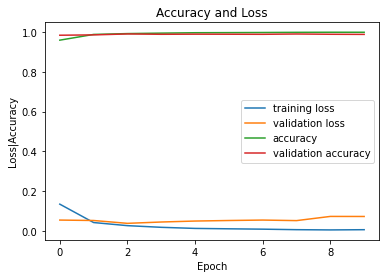

In [ ]:
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print(score)

[0.049575325101614, 0.9872000217437744]


Giá trị dự đoán:  2


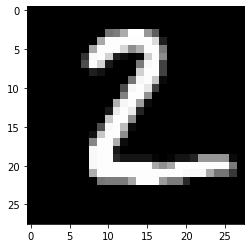

In [ ]:
# Kiểm tra dự đoán
plt.imshow(x_test[1].reshape(28, 28), cmap='gray')

y_pred = model.predict(x_test[1].reshape(1, 28, 28, 1))
print('Giá trị dự đoán: ', np.argmax(y_pred))

**Thay đổi các thuộc tính**

Learning rate:  0.0005
Learning rate:  0.001
Learning rate:  0.005
Learning rate:  0.01
Learning rate:  0.05
Learning rate:  0.1
Learning rate:  0.5


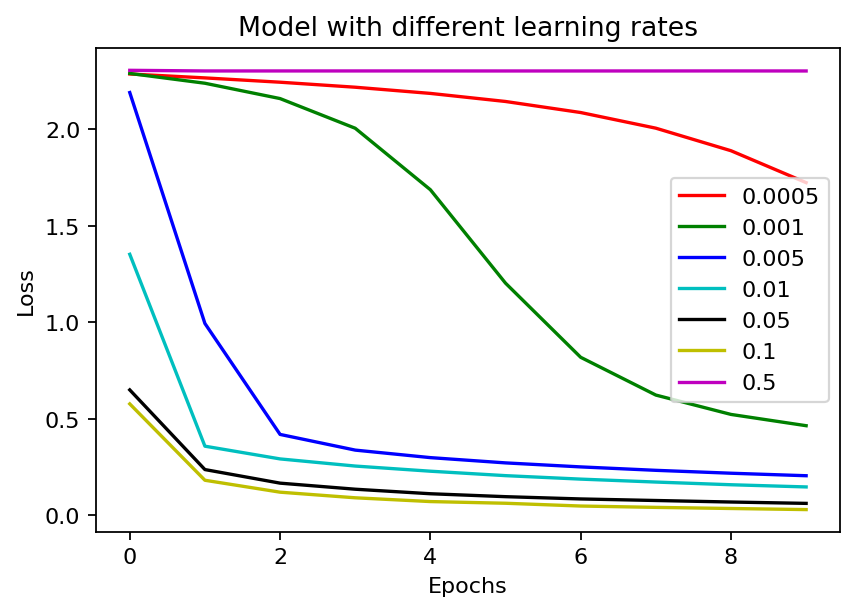

In [ ]:
# Thay đổi learning rate
learning_rate = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
colors = ['r', 'g', 'b', 'c', 'k', 'y', 'm']

plt.figure(figsize=(6, 4), dpi=160)

for i, lr in enumerate(learning_rate):
  # train model
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr),
              metrics=['accuracy'])
  
  H = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=256, epochs=10, verbose=0)

  # plot loss
  print('Learning rate: ', lr)
  plt.plot(H.history['loss'], colors[i])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model with different learning rates')
plt.legend(learning_rate)
plt.show()


Optimizer:  SGD
Optimizer:  Adagrad
Optimizer:  RMSprop
Optimizer:  Adam


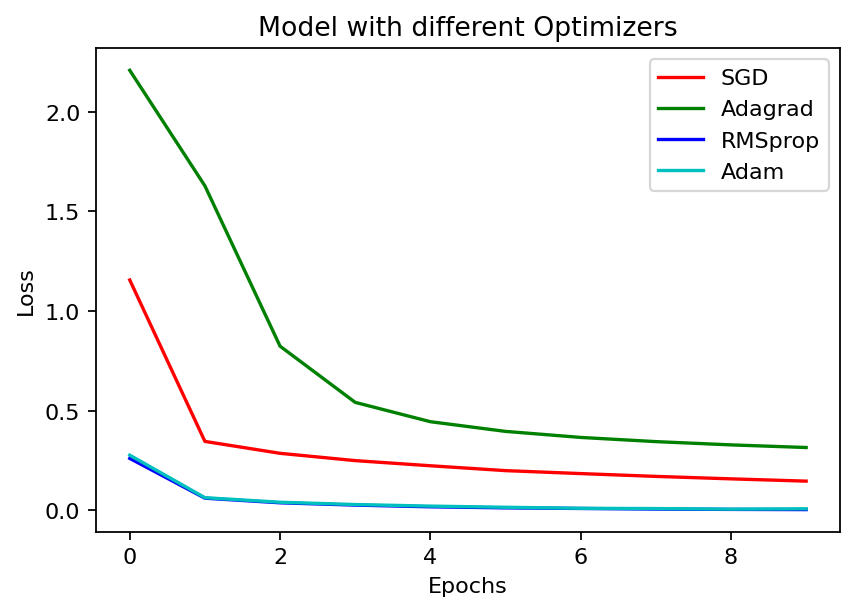

In [ ]:
# Thay đổi optimizer
optimizers = [SGD, Adagrad, RMSprop, Adam]
opt_name = ['SGD', 'Adagrad', 'RMSprop', 'Adam']

plt.figure(figsize=(6, 4), dpi=160)

for i, opt in enumerate(optimizers):
  # train model
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer = opt(),
              metrics=['accuracy'])
  
  H = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=256, epochs=10, verbose=0)

  # plot loss
  print('Optimizer: ', opt_name[i])
  plt.plot(H.history['loss'], colors[i])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model with different Optimizers')
plt.legend(opt_name)
plt.show()

Optimizers RMSprop và Adam cho kết quả tốt hơn các optimizers còn lại

Kernel size:  2
Kernel size:  3
Kernel size:  4
Kernel size:  5
Kernel size:  6
Kernel size:  7
Kernel size:  8


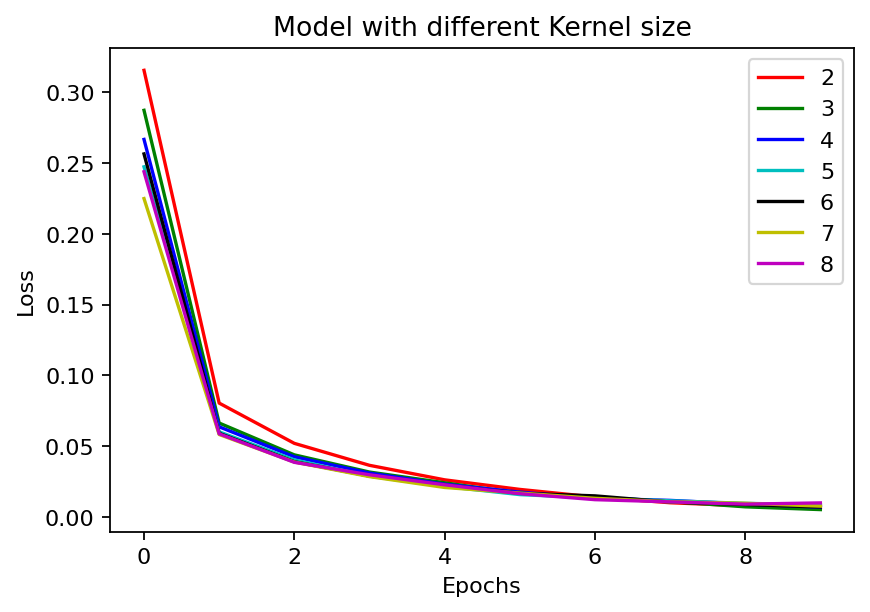

In [ ]:
# Thay đổi kernel size
kernel_size = [2, 3, 4, 5, 6, 7, 8]

plt.figure(figsize=(6, 4), dpi=160)

for i, kz in enumerate(kernel_size):
  # train model
  model = Sequential()
  model.add(Conv2D(32, (kz, kz), padding="same", activation='relu', input_shape=(28, 28, 1)))
  model.add(Conv2D(32, (kz, kz), activation='relu'))
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer = Adam(),
              metrics=['accuracy'])
  
  H = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=256, epochs=10, verbose=0)

  # plot loss
  print('Kernel size: ', kz)
  plt.plot(H.history['loss'], colors[i])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model with different Kernel size')
plt.legend(kernel_size)
plt.show()

Kernel size bằng 7 cho kết quả tốt nhất. Nên chưa chắc kernel size lớn đã cho kết quả tốt.

Number kernels:  16
Number kernels:  32
Number kernels:  48
Number kernels:  64
Number kernels:  72
Number kernels:  96
Number kernels:  120


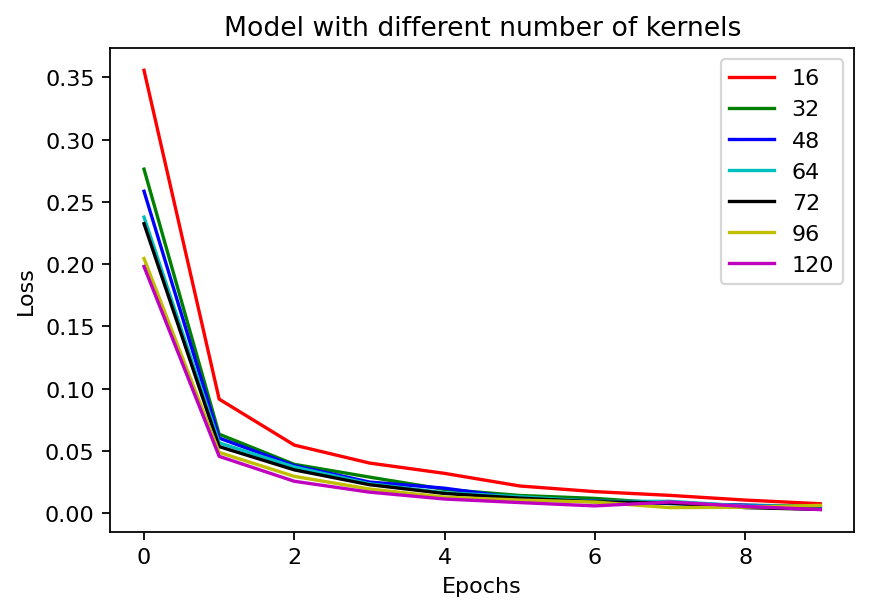

In [ ]:
# Thay đổi số kernel
num_kernels = [16, 32, 48, 64, 72, 96, 120]

plt.figure(figsize=(6, 4), dpi=160)

for i, nk in enumerate(num_kernels):
  # train model
  model = Sequential()
  model.add(Conv2D(nk, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))
  model.add(Conv2D(nk, (3, 3), activation='relu'))
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer = Adam(),
              metrics=['accuracy'])
  
  H = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=256, epochs=10, verbose=0)

  # plot loss
  print('Number kernels: ', nk)
  plt.plot(H.history['loss'], colors[i])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model with different number of kernels')
plt.legend(num_kernels)
plt.show()

Nhìn chung, số lượng kernel càng lớn thì model thu được càng tốt.

### Bài 4: Build model tương tự VGG16 (có thể nông hơn) cho cifar10.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
num_classes = 10

In [ ]:
print("Training set: \t", x_train.shape)
print("Test set: \t", x_test.shape)

Training set: 	 (50000, 32, 32, 3)
Test set: 	 (10000, 32, 32, 3)


In [ ]:
# split training set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=10_000)

print("Training set: \t", x_train.shape)
print("Val set:\t", x_val.shape)

Training set: 	 (40000, 32, 32, 3)
Val set:	 (10000, 32, 32, 3)


In [ ]:
# normalize
x_train = x_train / 255.
x_test = x_test / 255.
x_val = x_val /255.

In [ ]:
# one-hot
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D())
MaxPool2D vs Maxpooling2D
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_174 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 8, 8, 256)       

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(),
              metrics=['accuracy'])
  
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=256, epochs=10, verbose=1)

Epoch 1/10
157/157 [==============================] - 17s 102ms/step - loss: 2.1862 - accuracy: 0.1938 - val_loss: 1.5967 - val_accuracy: 0.4036
Epoch 2/10
157/157 [==============================] - 16s 99ms/step - loss: 1.4565 - accuracy: 0.4550 - val_loss: 1.2436 - val_accuracy: 0.5399
Epoch 3/10
157/157 [==============================] - 16s 99ms/step - loss: 1.1522 - accuracy: 0.5793 - val_loss: 1.0605 - val_accuracy: 0.6402
Epoch 4/10
157/157 [==============================] - 15s 98ms/step - loss: 0.8987 - accuracy: 0.6801 - val_loss: 0.9650 - val_accuracy: 0.6623
Epoch 5/10
157/157 [==============================] - 16s 100ms/step - loss: 0.7121 - accuracy: 0.7499 - val_loss: 0.9225 - val_accuracy: 0.6893
Epoch 6/10
157/157 [==============================] - 15s 98ms/step - loss: 0.5596 - accuracy: 0.8052 - val_loss: 0.8214 - val_accuracy: 0.7240
Epoch 7/10
157/157 [==============================] - 15s 98ms/step - loss: 0.3980 - accuracy: 0.8601 - val_loss: 0.8375 - val_accurac

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Loss: \t", score[0])
print("Accuracy: \t", score[1])

Loss: 	 1.1748292446136475
Accuracy: 	 0.7373999953269958


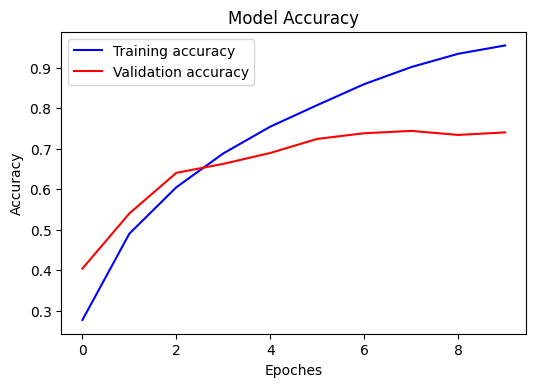

In [ ]:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(H.history['accuracy'], 'b-')
plt.plot(H.history['val_accuracy'], 'r-')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.show()

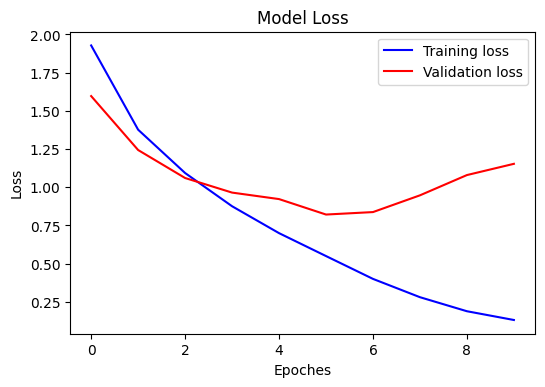

In [ ]:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(H.history['loss'], 'b-')
plt.plot(H.history['val_loss'], 'r-')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

In [ ]:
def convertOutput(y):
  switcher={
      0:'airplane',
      1:'automobile',
      2:'bird',
      3:'cat',
      4:'deer',
      5:'dog',
      6:'frog',
      7:'horse',
      8:'ship',
      9:'truct'
  }

  return switcher.get(y, "Don't know")

Reality:  ship
Predict:  ship


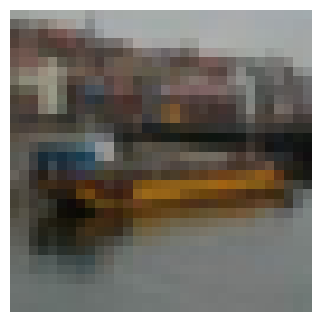

Reality:  truct
Predict:  truct


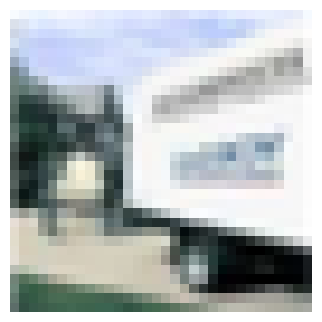

Reality:  automobile
Predict:  automobile


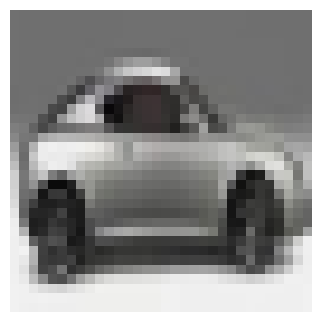

Reality:  frog
Predict:  frog


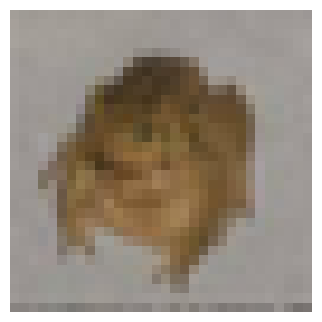

Reality:  frog
Predict:  frog


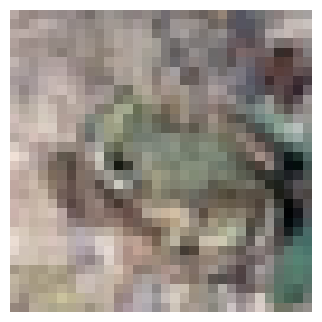

Reality:  deer
Predict:  deer


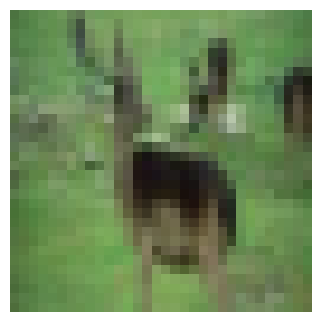

Reality:  horse
Predict:  horse


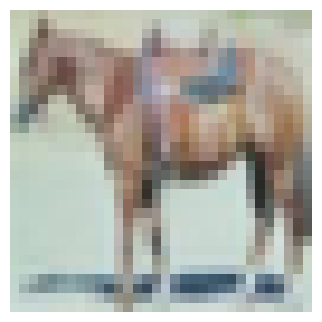

Reality:  automobile
Predict:  automobile


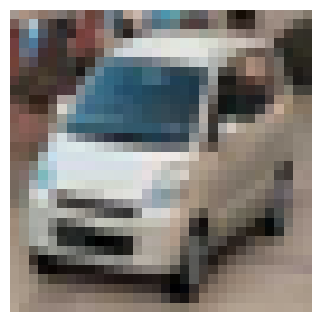

Reality:  dog
Predict:  cat


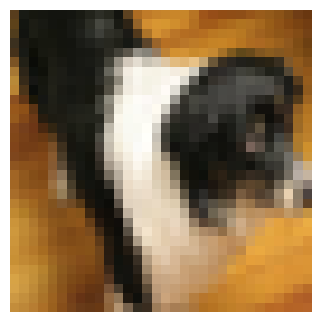

Reality:  automobile
Predict:  automobile


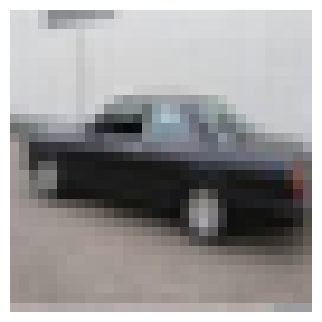

[1994, 9026, 2947, 2237, 9195, 8784, 3865, 4371, 6185, 6472]

In [ ]:
# evaluate
rand_list = [np.random.randint(0, 10_000) for i in range(10)]
for i in rand_list:
  plt.figure(figsize=(4, 4), dpi=100)
  plt.imshow(x_test[i])
  plt.axis('off')
  print('Reality: ', convertOutput(np.argmax(y_test[i])))
  y_pred = model.predict(x_test[i].reshape(1, 32, 32, 3))
  print('Predict: ', convertOutput(np.argmax(y_pred)))
  plt.show()

rand_list

# confusion matrix
# visualize ảnh predict sai

###Bài 5: Tại sao khi build model, càng sâu thì width, height giảm nhưng depth tăng.

Trong khi build model, ta có thể thấy kích thước layer giảm dần theo độ sâu. Việc các kích thước layers giảm dần giúp giảm thiểu đáng kể số lượng tham số mô hình, làm cho mạng neuron nhẹ hơn trong khi độ chính xác giảm đi không đáng kể. Chẳng hạn, sau khi trích xuất đặc trưng từ input, việc kích thước layer giảm đi một nửa có thể làm giảm đáng kể số lượng tham số trong khi các đặc điểm của đặc trưng đó vẫn được bảo toàn gần như toàn vẹn.

Trong khi đó, độ sâu layers tăng dần, tức là tăng số lượng bộ lọc giúp cho mạng CNN có thể học trích xuất được các đặc trưng chi tiết hơn. Ví dụ ở những layer đầu, mạng sẽ chỉ trích xuất được các đặc trưng như là line, hướng, ... và layer sau đó có thể triết xuất được những đặc điểm cao hơn như là sự kết hợp của nhiều line với các góc cạnh khác nhau. Cho tới những layer rất sâu, nó có thể trích xuất được những đặc trưng rất cao như bánh xe, tai, mắt, mũi, ... .
Vì vậy, mục đích chính của việc tăng dần độ sâu là để trích xuất dần dần các đặc trưng từ những đặc trưng cơ bản nhất cho tới những đặc trưng phức tạp.